In [1]:
# 워드 클라우드 모듈을 사용
from wordcloud import WordCloud

In [7]:
# naverhotel1.txt 파일 불러오기
f = open('../data/naverhotel1.txt', mode='rt', encoding='utf-8')
text = f.read()
text

'교육차 서울 출장을 왔다가 늦은 시간 예약과 체크아웃 했습니다.핸드폰 충전기를 가져오지 않아서 곤란했었는데 프론트 데스크에서 대여받을 수 있었습니다. 문의사항이나 요청사항도 친절히 응대해 주셨고, 마침 객실에 여유가 있다고 요청하지 않은 객실 업그레이드도 해주었습니다.아쉽게도 점심뷔페는 예약제로 진행하고 있어서 만석이라 이용하지 못했지만, 인원을 제한하고 명단을 작성하는 것도 믿음이 갔습니다.객실은 깨끗하고 조용했습니다.다음번에도 이용할 생각이 있고, 주변에도 추천합니다.\n위치나쁘지않고룸컨디션도괜찮다고생각햇는데,, 침대밑에먼지가득에앞투숙객이잊고간짐들도보이고..실망스러워요ㅜ\n주차장이 넓고 객실이 깨끗합니다. 주변에 음식점들이 많고 편의시설이 많습니다. 프론트 데스크 직원도 문의사항이나 요청사항에 대해 친절하게 처리해 주었습니다.\n1박 했습니다.강남 부근에서 숙박하기 좋은 호텔입니다.가성비 갑.방 깨끗하고 딱 필요한 것들 다있어요.샤워박스 욕조 두 타입중 하나 선택해야 합니다.\n객실이 너무깨끗하고 직원분들 서비스가 친절해서 좋았어요!다음에 또 방문하려구요~~어메니티도 아베다여서 너무 맘에들어요 ㅎㅎ\n문의전화도 다 친절하게 받아주시고, 고객이 요구하는 커스텀들을 너무 친절하게 응대해주셔서 너무 즐거운 시간 보냈습니다.\n침구도좋구 직원들도 너무 친절해서 잘쉬다 갑니다~~다음에 또 방문의사 천프로입니당~다들수고하시고~~코로나.조심하세요~~\n매번 서울출장 올때마다 들리는데위치도좋고 깔끔해서 좋네요다들 친절하시고 조식메뉴도 너무 맛있습니다추천해드려요\n깨끗하고 직원분들도 친절해서 좋았습니다역삼역과 접근성도 좋고, 강남, 삼성으로 이동도 용이합니다. 벨보이인형 및 로비가 인상적입니다\n서울 강남 한복판에서 조용히 잘 쉬었네요.연식은 조금 느껴지지만군더더기 없이 깔끔합니다어메니티가 아베다인 것도 좋았습니다\n도심에 위치하여 교통 편하고주변에 편의시설이 잘 되어 있습니다내부는 깔끔하고 전망이 좋네요프론트 직원들이 친절합니다\n서울에 출장 올때마다 늘 들립니다.깨끗

In [ ]:
# Okt 형태소 사용
from konlpy.tag import Okt
okt = Okt()
tokens_ko = okt.nouns(text)
tokens_ko

In [22]:
# 한국어 자연어처리 모듈 
import nltk
nouns_text = nltk.Text(tokens_ko)
nouns_text

<Text: 교육 차 서울 출장 시간 예약 체크아웃 핸드폰...>

In [23]:
# matplotlib font 사용
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

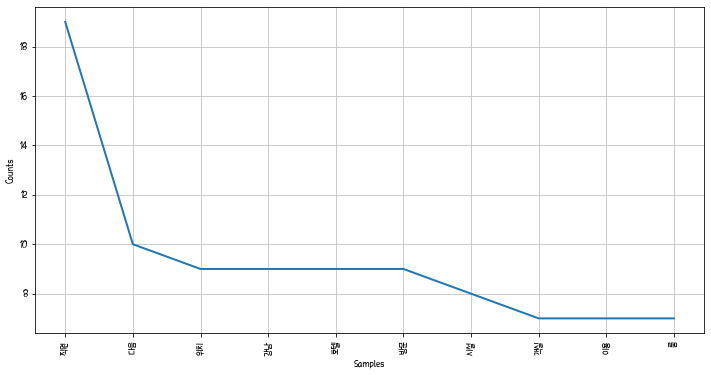

In [24]:
# 빈출단어 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
nouns_text.plot(10)

In [27]:
# 가장 많이 발생한 단어를 선택 (200개)
data = nouns_text.vocab().most_common(200)
len(data)

200

In [13]:
# 워드클라우드 font 설정
myfontpath = "data/THEdog.ttf" 

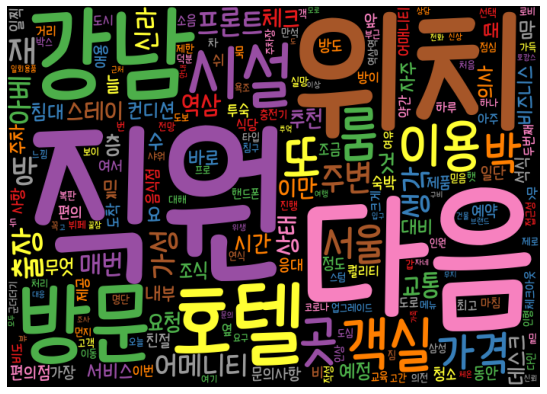

In [28]:
# 워드클라우드 
wc = WordCloud(font_path=myfontpath,                     ## .한글에 대한 위치를 표시한다. 
                relative_scaling = 0.2,
                background_color='black',
                width=700,
                height=500,
                colormap='Set1'
                ).generate_from_frequencies(dict(data))  ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,7))
plt.imshow(wc)                                           ## .이미지를 출력한다 
plt.axis("off")                                          ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

In [9]:
# 워드클라우드 png저장
wc.to_file('output/hw8.png')